In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import numpy as np
from scipy import stats
from utils.eda import test_hazard_on_col, get_outliers

In [2]:
df = pd.read_csv('water-training.csv')

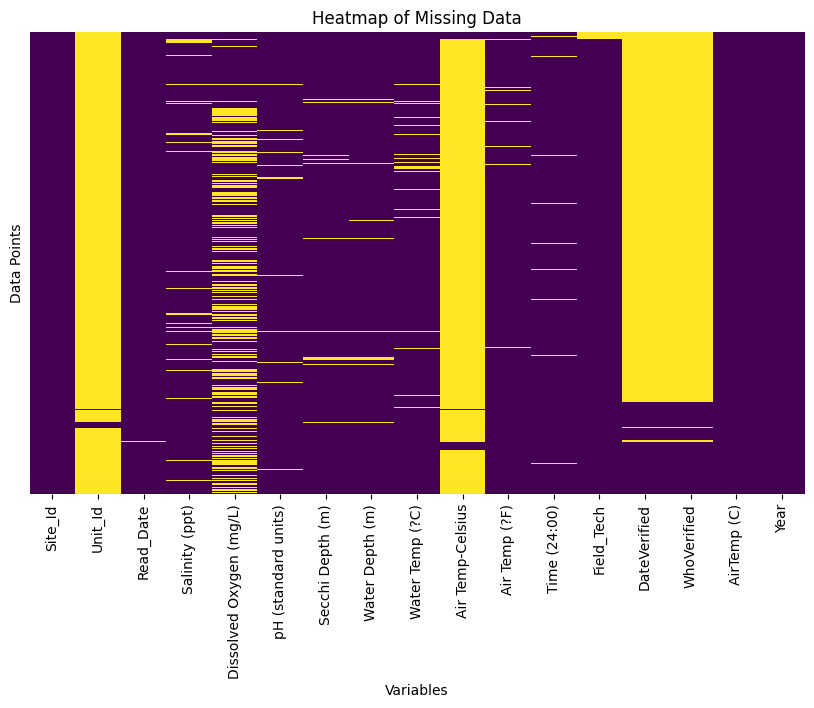

Site_Id                     0.042176
Unit_Id                    98.650358
Read_Date                   0.210881
Salinity (ppt)              5.482919
Dissolved Oxygen (mg/L)    35.892029
pH (standard units)         4.006748
Secchi Depth (m)            3.078870
Water Depth (m)             2.994517
Water Temp (?C)             5.103332
Air Temp-Celsius           96.415015
Air Temp (?F)               2.994517
Time (24:00)                2.657107
Field_Tech                  1.644876
DateVerified               80.894137
WhoVerified                80.894137
AirTemp (C)                 0.000000
Year                        0.000000
dtype: float64


In [3]:
# Create a DataFrame indicating where data is missing
missing_data = df.isnull()
has_data = df.notnull()

# Set up the size of the figure
plt.figure(figsize=(10, 6))

# Create a heatmap to visualize the missing data
sns.heatmap(missing_data, cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.xlabel('Variables')
plt.ylabel('Data Points')
plt.show()
print(df.isnull().sum() / len(df) * 100)

# MNAR / MAR / MCAR

In [4]:
data = df.select_dtypes(include="number")
interpretation_df = pd.DataFrame(columns = data.columns)
for col in data.columns:
    results_df = test_hazard_on_col(df, col)
    try:
        interpretation_df = pd.concat([interpretation_df, results_df[results_df['Is Significant'] == True]], axis=0)
    except:
        pass
print(set(interpretation_df['Variable'].tolist()), "MNAR")

Not enough data to perform tests for column 'AirTemp (C)'.
Not enough data to perform tests for column 'Year'.
{'Dissolved Oxygen (mg/L)', 'AirTemp (C)', 'Year'} MNAR


c:\Users\vince\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\vince\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\vince\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


# Correlations

<Axes: >

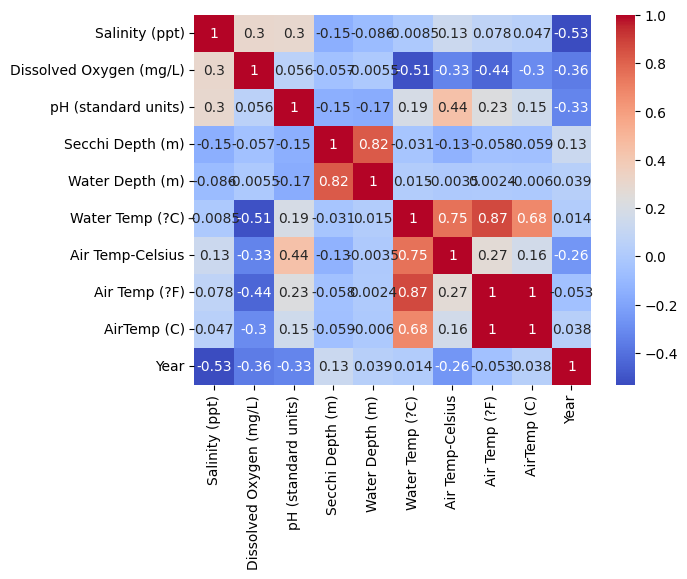

In [5]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

# Feature Engineering

Skewness

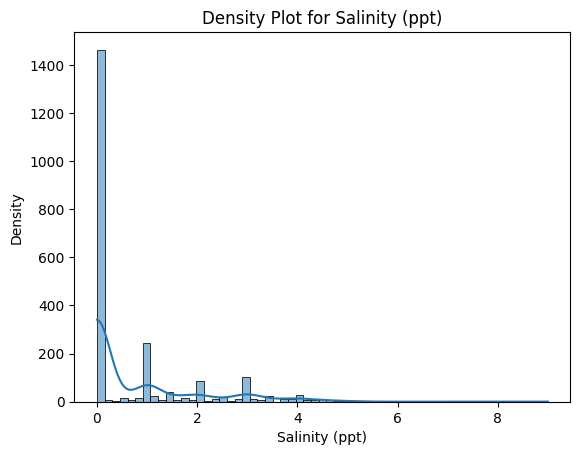

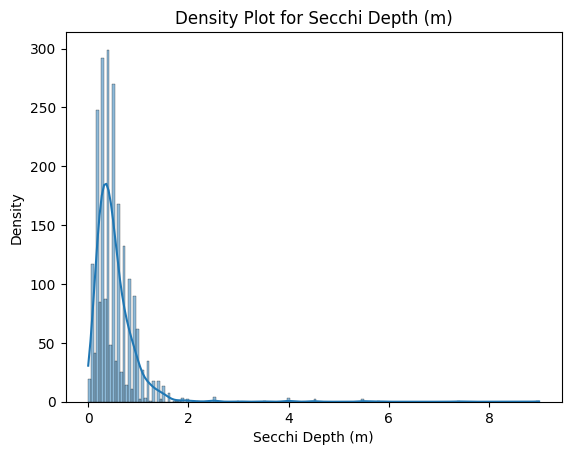

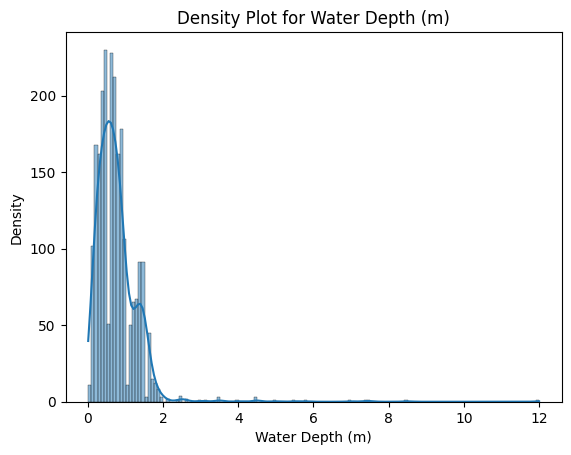

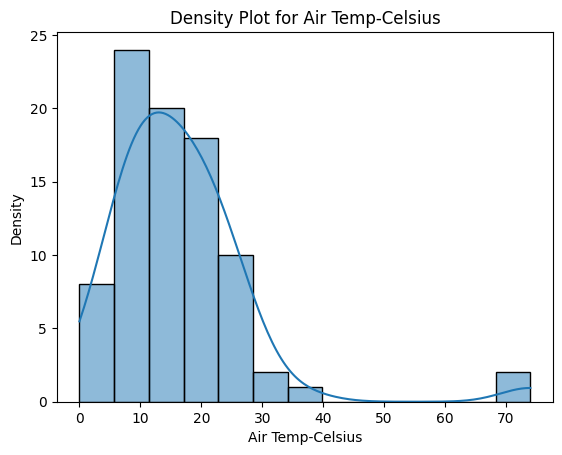

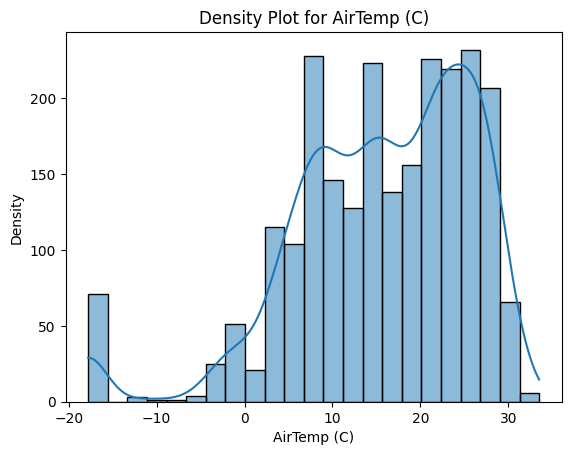

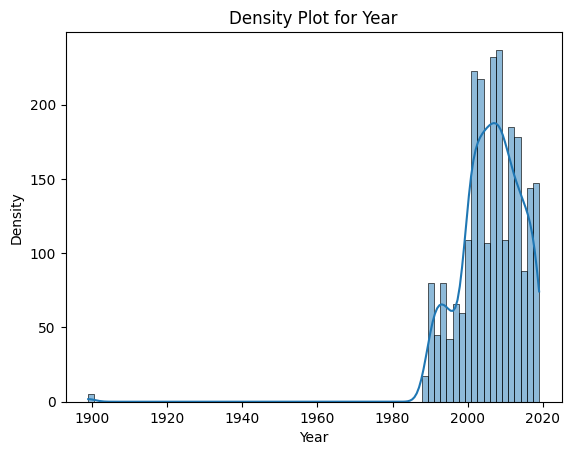

In [6]:
skew_df = data.skew()
skewed_columns = skew_df[(skew_df > 0.5) | (skew_df < -0.5)].index.tolist()

for col in skewed_columns:
    sns.histplot(df[col],kde=True)
    plt.title('Density Plot for {}'.format(col))
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

In [ ]:
#Correct right skewed data
#df['log_feature'] = np.log1p(df['feature'])

#Correct left skewed data
#df['sqrt_feature'] = np.sqrt(df['feature'])

#Correct bimodal data
#df['exp_feature'] = df['feature'] ** 2

#Correct multimodal data
#df['cube_feature'] = df['feature'] ** 3

outliers

In [7]:
get_outliers(df, data.columns[0])

,Site_Id,Unit_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),Time (24:00),Field_Tech,DateVerified,WhoVerified,AirTemp (C),Year
35,Bay,NaN,11/28/1994,2.8,9.4,7.7,0.25,0.65,13.0,17.5,63.5,10:30,NaN,NaN,NaN,17.500000,1994
37,Bay,NaN,12/29/1994,3.0,10.4,6.9,0.15,0.40,8.0,9.5,49.1,11:00,NaN,NaN,NaN,9.500000,1994
59,Bay,NaN,2/7/1990,3.4,10.8,7.5,0.20,0.60,10.0,NaN,50.0,0:00,"J Phillips, Mary Feldman",NaN,NaN,10.000000,1990
60,Bay,NaN,2/12/1990,3.2,10.6,7.0,0.20,0.70,10.0,NaN,48.2,4:48,"J Phillips, Mary Feldman",NaN,NaN,9.000000,1990
61,Bay,NaN,2/20/1990,4.2,11.6,7.5,0.15,0.39,5.0,NaN,41.0,0:00,"J Phillips, Mary Feldman",NaN,NaN,5.000000,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,Bay,NaN,10/28/2008,3.0,7.0,7.5,0.70,0.90,11.0,NaN,45.0,0:00,S. Poe,NaN,NaN,7.222222,2008
1392,Bay,NaN,11/6/2008,3.0,5.9,7.0,0.20,0.30,20.0,NaN,59.0,0:00,S. Poe,NaN,NaN,15.000000,2008
2236,B,NaN,8/1/2018,8.0,NaN,6.5,0.40,0.40,30.0,NaN,83.0,10:35,Sue Poe,10/30/2019,Christine Folks,28.333333,2018
2268,Bay,NaN,7/18/2018,2.6,6.2,7.0,0.60,0.90,26.0,NaN,80.0,09:40,Sue Poe,10/30/2019,Christine Folks,26.666667,2018


dummies